In [154]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import os
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
current_dir = os.getcwd()
src_path = os.path.join(current_dir, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)

import viz
import grid
import cell
import FVM

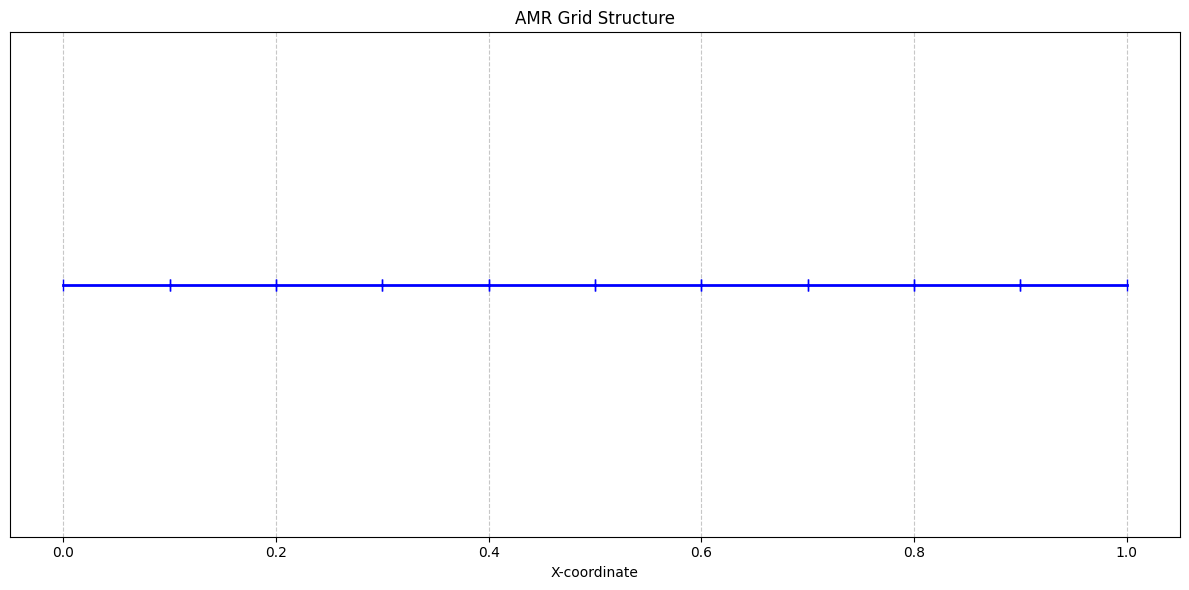

In [156]:
grid0 = grid.grid(1, 10)
viz.plot_amr_grid(grid0)

In [ ]:
# Initialize the grid with Sod Rod Problem
def init_grid(grid):
    active_cells = grid.get_all_active_cells()

    if not active_cells:
        print("No active cells found to initialize.")
        return

    cell_x_coords = np.array([cell.x for cell in active_cells])

    all_prims_array = np.empty((len(active_cells), 3), dtype=float)

    state_left = np.array([1.0, 0.0, 1.0])
    state_right = np.array([0.125, 0.0, 0.1])

    mask = cell_x_coords < 0.5

    all_prims_array[mask] = state_left
    all_prims_array[~mask] = state_right 

    grid.update(all_prims_array)

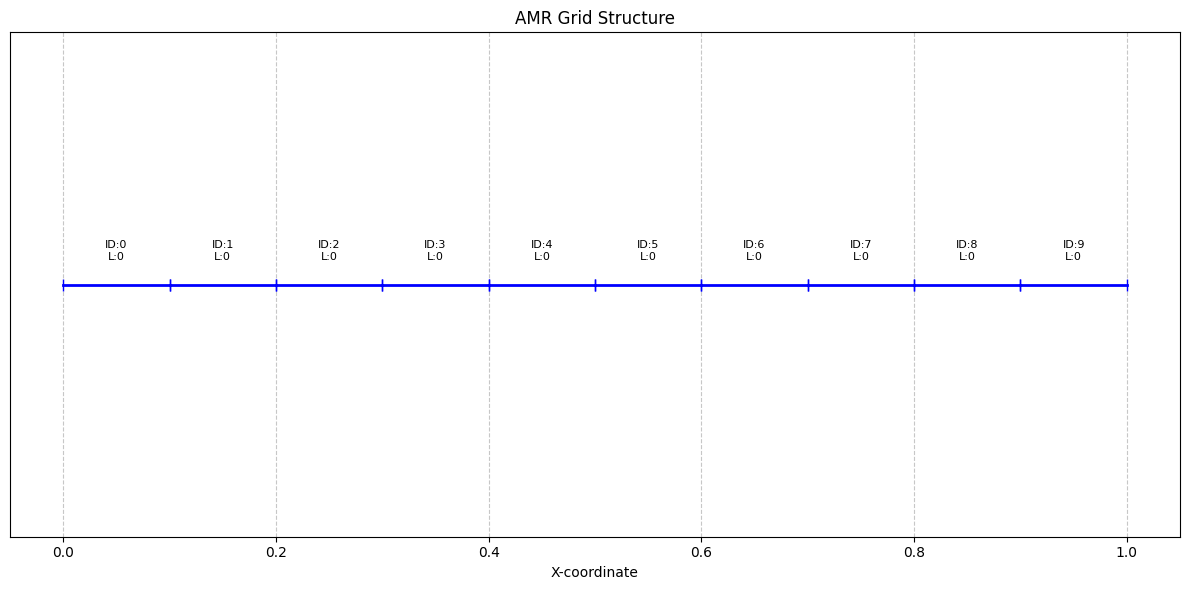

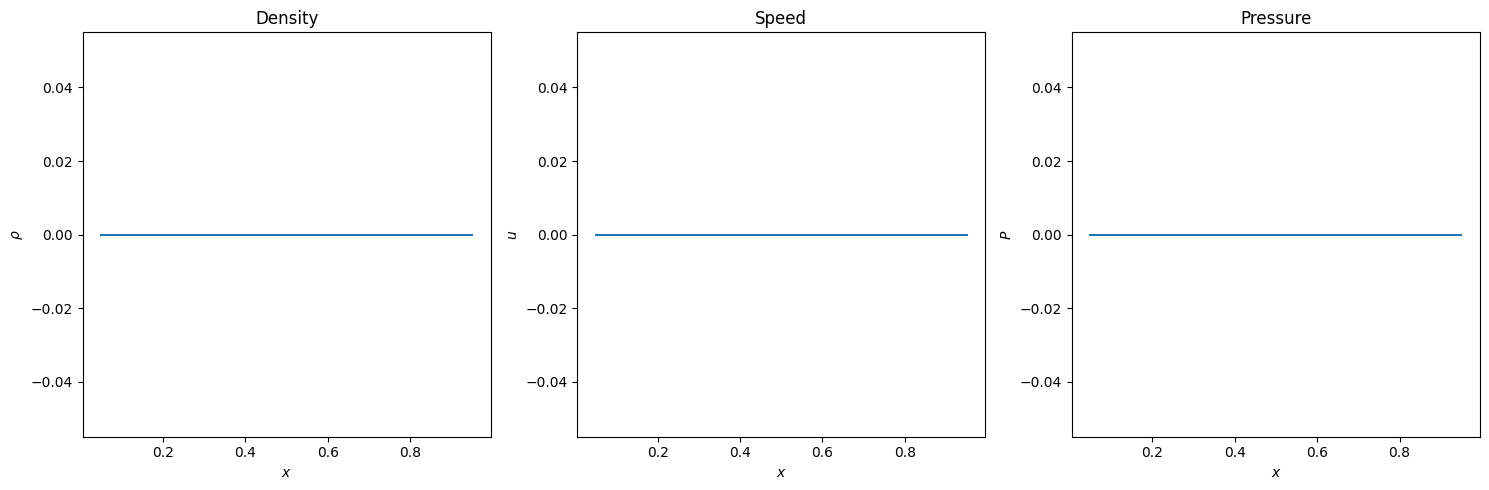

In [165]:
grid0 = grid.grid(1, 10)
init_grid(grid0)

viz.plot_amr_grid(grid0, label=True)
viz.plot_amr_value(grid0)

[[1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.    1.   ]
 [1.    0.   

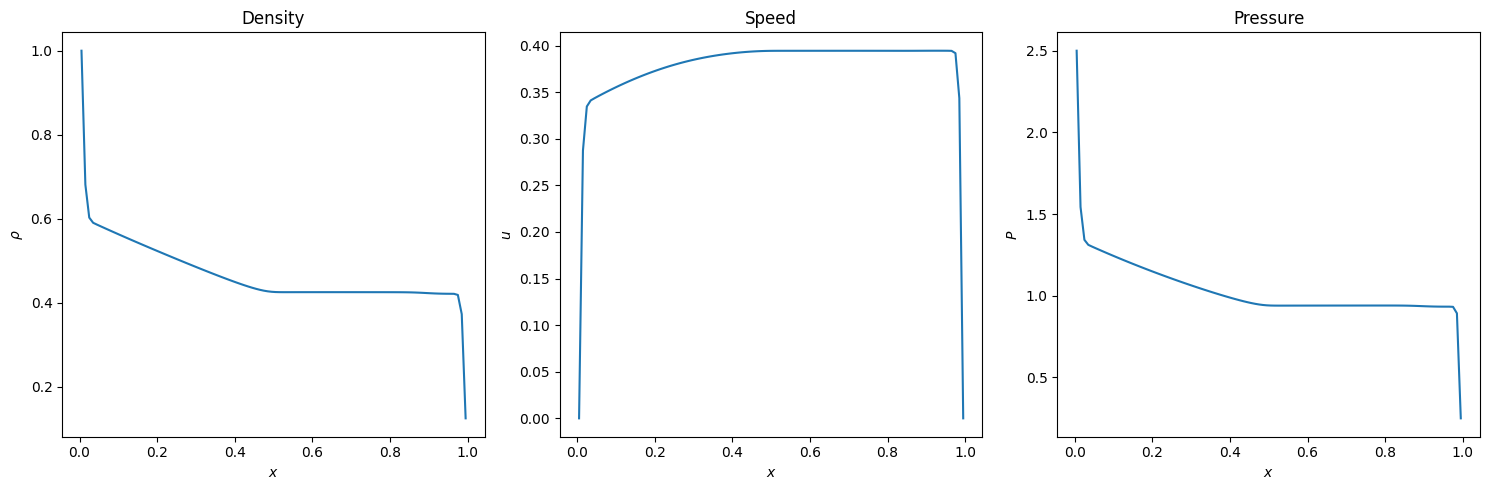

In [160]:
grid1 = grid.grid(L=1, N=100)
init_grid(grid1)
FVM.solve(FVM.HLL_flux, grid1, 1)
viz.plot_amr_value(grid1)